**Python packages and libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

**Data loading**

In [2]:
df = pd.read_csv('empirical_data.csv')

**Data inspection**

In [3]:
df.shape

(5921, 4)

In [4]:
df.columns

Index(['encounter_id', 'start_date', 'end_date', 'duration'], dtype='object')

In [5]:
df['start_date'] = pd.to_datetime(df['start_date'])

df['end_date'] = pd.to_datetime(df['end_date'])

In [6]:
df.dtypes

encounter_id             int64
start_date      datetime64[ns]
end_date        datetime64[ns]
duration               float64
dtype: object

In [7]:
df.tail()

,encounter_id,start_date,end_date,duration
5916,391813,2023-11-29 12:55:15.517,2023-11-29 13:01:33.488,6.2833
5917,392402,2023-11-29 18:49:58.765,2023-11-29 19:05:08.606,15.1500
5918,394707,2023-12-01 16:03:34.832,2023-12-01 16:17:47.238,14.2000
5919,394772,2023-12-01 16:49:00.384,2023-12-01 17:07:18.792,18.3000
5920,395260,2023-12-02 01:13:50.697,2023-12-02 01:22:53.810,9.0500


**Feature engineering**

In [8]:
df['implemented'] = df['start_date'].apply(lambda x: False if x < pd.to_datetime('2022-12-31') else True)

In [9]:
df.implemented.value_counts()

True     3015
False    2906
Name: implemented, dtype: int64

**Statistics**

In [10]:
focal_parameter = 'duration'

Text(61, 0.01, 'Mann-Whitney \nU=4135606.5 \np-value < 0.01')

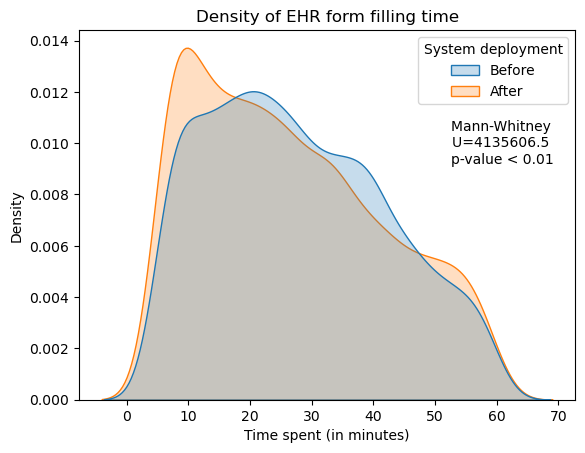

In [11]:
sns.kdeplot(
    data = df.rename(columns={'implemented': 'System deployment'}).replace({True:'After', False:'Before'}),
    x = focal_parameter,
    hue = 'System deployment',
    fill = True
)

plt.title('Density of EHR form filling time')
plt.xlabel('Time spent (in minutes)')
plt.ylabel('Density')


plt.text(x = 61, y = 0.010, s = 'Mann-Whitney \nU=4135606.5 \np-value < 0.01', ha="center", va="center", fontsize=10)

# plt.legend()


In [12]:
(df.query('implemented == True')[focal_parameter].median(),
 df.query('implemented == False')[focal_parameter].median())

(24.2167, 25.94165)

In [13]:
print('focal_parameter:', focal_parameter)

stats.mannwhitneyu(
        x = df.query('implemented == True')[focal_parameter].to_list(),
        y = df.query('implemented == False')[focal_parameter].to_list(),
        alternative = 'less'
)

focal_parameter: duration


MannwhitneyuResult(statistic=4135606.5, pvalue=9.621279136894727e-05)